In [5]:
import pmdarima as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('../data/usa-annual-temp.csv')
df = df.loc[df['year']>=1970,:]
df['year'] = pd.to_datetime(df['year'], format='%Y')
df = df.set_index('year').sort_index()
df

,temp
year,
1970-01-01,8.53
1971-01-01,8.29
1972-01-01,8.19
1973-01-01,8.75
1974-01-01,8.67
1975-01-01,8.25
1976-01-01,8.40
1977-01-01,9.08
1978-01-01,8.56


In [7]:
model = pm.auto_arima(df['temp'])


In [8]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   52
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 -34.806
Date:                Tue, 18 Apr 2023   AIC                             71.611
Time:                        22:29:28   BIC                             73.543
Sample:                    01-01-1970   HQIC                            72.350
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.2293      0.046      4.944      0.000       0.138       0.320
===================================================================================
Ljung-Box (L1) (Q):                   2.46   Jarque-Bera (JB):                 0.13
Prob(Q):                              0.12   Prob(JB):                         0.94
Heteroskedasticity (H):               0.83   Skew:                            -0.12
Prob(H) (two-sided):                  0.70   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model.predict('')

/Users/fordfishman/opt/anaconda3/envs/time-series/lib/python3.11/site-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(4,1,1)(2,0,2)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/Users/fordfishman/opt/anaconda3/envs/time-series/lib/python3.11/site-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/Users/fordfishman/opt/anaconda3/envs/time-series/lib/python3.11/site-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/Users/fordfishman/opt/anaconda3/envs/time-series/lib/python3.11/site-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
                           ^^^^^^^^^^^^^^
  File "/Users/fordfishman/opt/anaconda3/envs/time-series/lib/python3.11/site-packages/pmdarima/arima/arima.py", line 510, in _fit

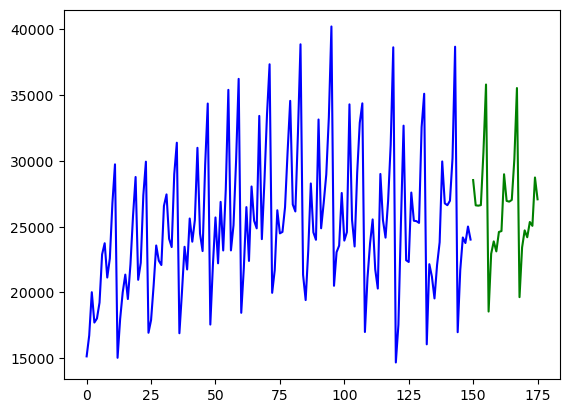

In [14]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Load/split your data
y = pm.datasets.load_wineind()
train, test = train_test_split(y, train_size=150)

# Fit your model
model = pm.auto_arima(train, seasonal=True, m=12)

# make your forecasts
forecasts = model.predict(test.shape[0])  # predict N steps into the future

# Visualize the forecasts (blue=train, green=forecasts)
x = np.arange(y.shape[0])
plt.plot(x[:150], train, c='blue')
plt.plot(x[150:], forecasts, c='green')
plt.show()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  150
Model:             SARIMAX(2, 1, 1)x(2, 0, [], 12)   Log Likelihood               -1418.496
Date:                             Mon, 17 Apr 2023   AIC                           2848.992
Time:                                     11:12:14   BIC                           2867.016
Sample:                                          0   HQIC                          2856.315
                                             - 150                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0339      0.079     -0.430      0.667      -0.188       0.121
ar.L2         -0.2113      0.094     -2.248      0.025      -0.396      -0.027
ma.L1         -0.8622      0.017    -50.296      0.000      -0.896      -0.829
ar.S.L12       0.5045      0.043     11.845      0.000       0.421       0.588
ar.S.L24       0.3313      0.060      5.504      0.000       0.213       0.449
sigma2      9.568e+06   2.26e-09   4.23e+15      0.000    9.57e+06    9.57e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):               461.42
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                             1.29
Prob(H) (two-sided):                  0.01   Kurtosis:                        11.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.47e+30. Standard errors may be unstable.
"""